In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

X1 = np.matrix([[70.4611978, 6.77435737], [26.63557899, 6.18519845], [21.21435842, 5.98482521],
      [49.46520438, 6.46685477], [36.31867059, 6.26767026], [65.40450545, 6.69973324],
      [47.63604002, 6.52991946], [51.12650291, 6.55278139], [16.19718639, 5.8701804],
      [41.09647679, 6.39265021], [48.52977517, 6.54874167], [33.2783272, 6.24645442],
      [54.2416494, 6.68772955], [63.87981696, 6.64426231], [49.74926534, 6.54019839],
      [45.50085081, 6.40530107], [31.80572899, 6.33114329], [25.88027769, 6.00191626],
      [25.34847504, 6.07445523], [59.5509754, 6.67139653], [50.69674158, 6.51872281],
      [54.11728722, 6.58716206], [58.22172538, 6.58217774], [38.82480513, 6.43235051],
      [54.62361945, 6.62107478], [42.24368621, 6.43349846], [44.91058546, 6.40702283],
      [62.72139429, 6.81082283], [77.55458346, 6.86015373], [49.07536097, 6.58151526],
      [51.48292856, 6.62113585], [57.37090719, 6.65400127], [48.48641553, 6.54340401],
      [21.24715108, 6.07259954], [37.64146721, 6.46820336], [12.35289436, 5.4695928],
      [37.65875476, 6.18370352], [49.85008383, 6.60947486], [66.13648137, 6.79896653],
      [27.29008652, 6.15868866], [82.89679414, 6.86219115], [60.28610161, 6.77246816],
      [45.99452861, 6.40409124], [77.29411953, 6.88564085], [49.24729059, 6.39129918],
      [52.19238458, 6.52793378], [55.55244532, 6.5922497], [38.28876143, 6.35421521],
      [41.28903755, 6.33314064], [73.83202683, 6.85274489], [62.84426032, 6.63317405],
      [27.66679337, 6.0765891], [64.90528747, 6.7277243], [62.75897971, 6.74867287],
      [57.47911597, 6.56964198], [32.54225548, 6.14425762], [44.7087849, 6.55684065],
      [30.22868535, 6.17664755], [66.43902044, 6.66354862], [57.50647725, 6.63295779],
      [56.23274763, 6.65483072], [71.62377075, 6.8249259], [37.21929751, 6.45896618],
      [30.33685416, 6.29108668], [53.72586113, 6.55558498], [58.92009067, 6.58914418],
      [60.36917635, 6.73713645], [46.46087002, 6.61086064], [54.97919255, 6.48830287],
      [60.08999745, 6.63018137], [29.23503961, 6.06804535], [45.18879885, 6.44043758],
      [67.91432786, 6.8105173], [46.5800853, 6.50060039], [56.70569052, 6.65565127],
      [40.68951533, 6.41478636], [48.67956085, 6.48811567], [41.59182624, 6.38699182],
      [39.95740486, 6.33546435], [44.94880975, 6.46206514], [64.78053936, 6.74188874],
      [57.93695294, 6.73064008], [55.49704023, 6.64231398], [39.57510111, 6.29139288],
      [33.95225046, 6.33743394], [77.23246962, 6.79966126], [56.49647686, 6.66597049],
      [72.05710124, 6.83097927], [51.36582347, 6.63984591], [36.23540347, 6.26819074],
      [51.33172918, 6.55170989], [65.9107458, 6.7412432], [45.92145099, 6.55785946],
      [48.73393011, 6.5700271], [43.19824007, 6.5765512], [32.51187411, 6.17277242],
      [66.52125325, 6.7549236], [71.77667409, 6.77447514], [27.54687135, 6.07712865],
      [70.29209858, 6.82371897]])

X2 = np.matrix([[103.48734726, 7.06665128], [45.95181945, 6.92463529], [62.51311459, 7.29929464],
      [34.75905558, 6.82590246], [61.42150233, 7.14207452], [20.92995779, 6.18926827],
      [48.88757058, 7.10046058], [47.00567217, 6.87392491], [66.03960746, 7.21300884],
      [41.00765303, 6.88260887], [53.39454458, 7.12002753], [59.05801699, 7.07708207],
      [25.84457253, 6.52661965], [20.64948341, 6.4810278], [63.28046094, 7.18001038],
      [66.29002442, 7.24725685], [49.26589866, 7.02704851], [59.53968788, 7.12513223],
      [48.46665858, 6.97610637], [34.51909729, 6.85422354], [61.16606292, 7.1611797],
      [65.62870788, 7.25370585], [57.43965533, 7.12551572], [51.4256259, 7.12109028],
      [78.45648704, 7.38957843], [70.23973965, 7.28014297], [61.12178687, 7.14687961],
      [75.55803406, 7.2645782], [44.9666415, 7.00364604], [43.94509452, 6.94630876],
      [44.98195858, 6.94771427], [44.07909292, 6.84250384], [33.27404217, 6.76884994],
      [66.83707899, 7.26223859], [34.99475166, 6.75074986], [59.51675598, 7.18130986],
      [37.03437849, 6.87742508], [62.14584595, 7.21712651], [51.37422401, 7.1478843],
      [25.75396602, 6.83643475], [66.18768985, 7.28574587], [50.46927715, 7.0901681],
      [66.08232926, 7.28108743], [16.81537222, 6.44176855], [38.49515228, 6.85670726],
      [44.87889506, 6.89762361], [51.72803212, 7.15768698], [26.41099035, 6.69220322],
      [67.40763472, 7.25475514], [60.26711966, 7.13606818], [41.26604269, 6.82072533],
      [36.25102952, 6.81241658], [90.34415059, 7.10789215], [49.9112951, 7.04364433],
      [37.60574769, 6.75709643], [47.69027385, 7.15224795], [70.7126762, 7.37139046],
      [31.38034068, 6.57171353], [45.43488612, 6.97156664], [29.83557583, 6.77016354],
      [53.58242995, 7.14264146], [40.28103375, 6.88596508], [69.76687507, 7.29225697],
      [40.72428579, 6.90370374], [38.35168955, 6.72388286], [88.77752009, 7.30440221],
      [52.71910503, 7.10525341], [78.13634099, 7.43246583], [55.28469075, 7.15527197],
      [26.12154, 6.77911307], [57.9174037, 7.16031425], [59.96888213, 7.04359248],
      [28.979886, 6.69711096], [54.10548377, 7.08093707], [46.24087958, 7.03464403],
      [46.02151582, 6.98139406], [32.74868227, 6.69473258], [45.70424283, 6.94792668],
      [25.85436229, 6.58336042], [77.98270261, 7.41044107], [54.65190235, 7.11080335],
      [60.44627103, 7.07123203], [68.58296094, 7.33179762], [42.80337975, 6.87396778],
      [31.35673666, 6.66603545], [19.04585207, 6.62207371], [48.79436125, 7.01009406],
      [45.44124128, 7.08039785], [41.97937064, 6.854478], [53.39688062, 7.02525752],
      [66.0637938, 7.258192], [55.09943464, 7.1307132], [65.22295533, 7.28208667],
      [48.25983281, 6.93393588], [19.00711267, 6.33112045], [39.14998323, 6.99193013],
      [75.51283715, 7.34232193], [20.07554717, 6.65314899], [40.64087416, 6.81927983],
      [68.19628122, 7.3153336]])

X = np.concatenate([X1, X2],0);
y = np.concatenate([np.matrix(np.zeros([100,1])),np.matrix(np.ones([100,1]))]);

In [3]:
import random
random.seed(12)

percent_train = .8

#Standardize
XX = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)

# Partion data into training and test datasets
m, n = X.shape

y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:]
X_test = XX[test_idx,:]

y_train = y[train_idx]
y_test = y[test_idx]

In [4]:
X_train.shape, X_test.shape

((160, 2), (40, 2))

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64).flatten()
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([160, 2]), torch.Size([160]))

In [6]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64).flatten()
X_test_tensor.shape, y_test_tensor.shape

(torch.Size([40, 2]), torch.Size([40]))

In [7]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

In [8]:
#set the seed for reproducibility in shuffling
torch.manual_seed(999)

#set the dataloader
train_batch_size = 40
test_batch_size  = 40
#format: DataLoader(dataset, batch_size, shuffle)
train_loader = DataLoader(train_dataset, batch_size = train_batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size = test_batch_size, shuffle=False)

In [9]:
train_dataset[0]

(tensor([ 0.3500, -0.3094]), tensor(0))

In [10]:
class TestNN(nn.Module):
    
    def __init__(self, input_size=2, out_size=2, layer_size=[]):
        super().__init__()        
        layerlist = []
        for i in layer_size:
            layerlist.append(nn.Linear(input_size,i)
            layerlist.append(nn.ReLU(inplace=True)) 
            input_size = i 
        layerlist.append(nn.Linear(input_size,out_size))
        
        self.layers = nn.Sequential(*layerlist)
        
        
    def forward(self, x):
        x = self.layers(x)
        return x

In [11]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

model = TestNN(layer_size=[10,5])
model

TestNN(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=5, out_features=2, bias=True)
  )
)

In [12]:
J_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [13]:
#training
epochs = 100
train_losses = []
train_accs   = []
val_losses   = []
val_accs     = []

#for epochs
for i in range(epochs):
    total_corr = 0
    acc = 0
    
    #for loader
    for batch, (inputs, targets) in enumerate(train_loader):
#         inputs = inputs.to(device)
#         #targets = targets.to(device)
#         targets = targets.type(torch.LongTensor).to(device)
        
        batch_size = len(targets)
        
        #1. predict
        yhat = model(inputs)
        #1.1 calculate the accuracy
        predicted = torch.max(yhat, 1)[1]   #if you use 0, it will return the probability, 1 is for index
        batch_corr = (predicted == targets).sum()
        total_corr += batch_corr
        
        #2. loss
        loss = J_fn(yhat, targets)
        train_losses.append(loss)
        #3. clear gradients using zero_grad()
        optimizer.zero_grad()
        #4. backprop using backward()
        loss.backward()
        #5. update using step()
        optimizer.step()
        train_acc = (total_corr * 100) / (batch_size * (batch + 1))
        train_accs.append(train_acc)
        
        if batch % 2 == 0:
            acc = (total_corr * 100) / (train_batch_size * (batch + 1))
            print(f"Epoch: {i:1.0f}: Batch: {batch:>3}; Loss: {loss:3.2f}; Acc: {acc:3.2f}")
            
    with torch.no_grad():
        val_corr = 0 
        for val_inputs, val_targets in test_loader:
#             val_image = val_image.to(device)
#             val_label = val_label.to(device)
            val_yhat = model(val_inputs)
            val_loss = J_fn(val_yhat, val_targets)
            val_predicted = torch.max(val_yhat, 1)[1]
            val_corr += (val_predicted == val_targets).sum()
#             if val_loss < val_old_loss:
#                 torch.save(model.state_dict(), filepath)
        val_acc = (val_corr * 100) / len(test_dataset)
    val_accs.append(val_acc)
    val_losses.append(val_loss)
    
    print(f"++++++Validation++++++ Val Loss: {val_loss:.2f} - Val Acc: {val_acc:.2f}")

Epoch: 0: Batch:   0; Loss: 0.70; Acc: 55.00
Epoch: 0: Batch:   2; Loss: 0.74; Acc: 51.67
++++++Validation++++++ Val Loss: 0.73 - Val Acc: 47.50
Epoch: 1: Batch:   0; Loss: 0.67; Acc: 60.00
Epoch: 1: Batch:   2; Loss: 0.74; Acc: 55.00
++++++Validation++++++ Val Loss: 0.72 - Val Acc: 47.50
Epoch: 2: Batch:   0; Loss: 0.74; Acc: 45.00
Epoch: 2: Batch:   2; Loss: 0.66; Acc: 50.83
++++++Validation++++++ Val Loss: 0.72 - Val Acc: 47.50
Epoch: 3: Batch:   0; Loss: 0.65; Acc: 65.00
Epoch: 3: Batch:   2; Loss: 0.73; Acc: 49.17
++++++Validation++++++ Val Loss: 0.72 - Val Acc: 47.50
Epoch: 4: Batch:   0; Loss: 0.69; Acc: 55.00
Epoch: 4: Batch:   2; Loss: 0.74; Acc: 50.00
++++++Validation++++++ Val Loss: 0.72 - Val Acc: 47.50
Epoch: 5: Batch:   0; Loss: 0.71; Acc: 50.00
Epoch: 5: Batch:   2; Loss: 0.69; Acc: 51.67
++++++Validation++++++ Val Loss: 0.71 - Val Acc: 47.50
Epoch: 6: Batch:   0; Loss: 0.70; Acc: 50.00
Epoch: 6: Batch:   2; Loss: 0.76; Acc: 47.50
++++++Validation++++++ Val Loss: 0.71 - 

In [15]:
train_loss = [loss.item() for loss in train_losses]
test_loss = [loss.item() for loss in val_losses]

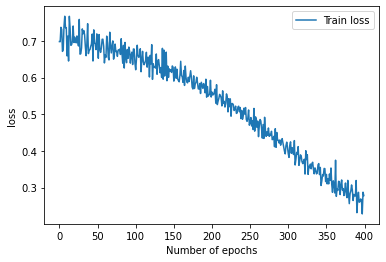

In [17]:
# Plot training loss
plt.plot(train_loss, label='Train loss')
#plt.plot(test_loss, label='Test loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

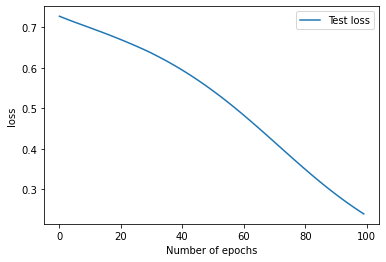

In [18]:
# Plot training loss
#plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

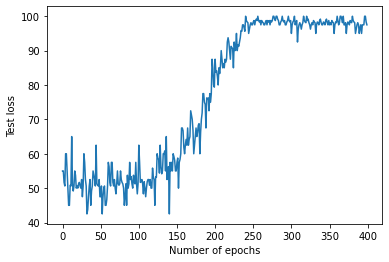

In [24]:
#train_correct = [x/len(y_train) for x in train_accs]
#test_correct = [x/len(y_test) for x in test_correct]
plt.plot(train_accs, label='Train Acc')
#plt.plot(test_correct, label='Test Acc')
plt.xlabel('Number of epochs')
plt.ylabel('Test loss')
plt.show()

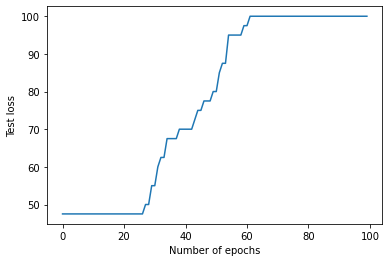

In [23]:
#train_correct = [x/len(y_train) for x in train_correct]
#test_correct = [x/len(y_test) for x in val_accs]
#plt.plot(train_correct, label='Train Acc')
plt.plot(val_accs, label='Test Acc')
plt.xlabel('Number of epochs')
plt.ylabel('Test loss')
plt.show()